<a href="https://colab.research.google.com/github/ishivxnshh/Machine-Learning/blob/main/project_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [384]:
import numpy as np
import pandas as pd

In [385]:
df = pd.read_csv('/content/placement.csv')

In [386]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [387]:
df.shape

(100, 4)

In [388]:
df = df.iloc[:,1:]

In [389]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


**Steps**
1.   Preprocess + EDA + Feature Selection
2.   Extract input and output cols
3.   Scale the values
4.   Train the model
5.   Evaluate the model/model selection
6.   Deploy the model

In [390]:
import matplotlib.pyplot as plt

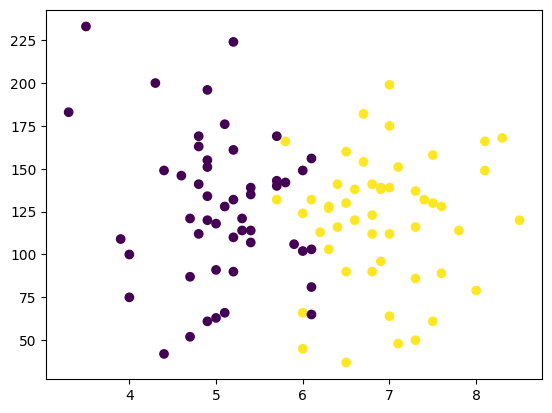

In [391]:
plt.scatter(df['cgpa'], df['iq'], c = df['placement'])

In [392]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [393]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [394]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [395]:
y.shape

(100,)

In [396]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [397]:
x_train

,cgpa,iq
68,4.0,75.0
82,6.5,37.0
62,6.0,102.0
69,8.5,120.0
87,5.7,132.0
...,...,...
4,5.8,142.0
76,4.9,155.0
35,6.8,90.0
96,4.4,42.0


In [398]:
x_test

,cgpa,iq
26,7.0,199.0
50,3.5,233.0
85,5.8,166.0
0,6.8,123.0
25,5.0,91.0
90,7.3,86.0
63,6.3,128.0
43,6.8,141.0
1,5.9,106.0
19,5.2,132.0


In [399]:
y_train

,placement
68,0
82,1
62,0
69,1
87,1
...,...
4,0
76,0
35,1
96,0


In [400]:
y_test

,placement
26,1
50,0
85,1
0,1
25,0
90,1
63,1
43,1
1,0
19,0


In [401]:
from sklearn.preprocessing import StandardScaler

In [402]:
scaler = StandardScaler()

In [403]:
x_train = scaler.fit_transform(x_train)

In [404]:
x_train

array([[-1.74561265, -1.20577586],
       [ 0.4424812 , -2.18692111],
       [ 0.00486243, -0.50864635],
       [ 2.19295628, -0.04389334],
       [-0.25770883,  0.265942  ],
       [ 1.14267123,  0.39504006],
       [-1.04542262,  0.4983185 ],
       [ 0.53000495,  0.42085967],
       [ 1.84286126,  0.7048754 ],
       [ 1.84286126,  1.1438088 ],
       [ 0.09238618,  0.88561268],
       [-1.04542262, -0.25045023],
       [ 1.14267123, -1.85126616],
       [ 0.4424812 ,  0.21430278],
       [-0.60780385, -0.19881101],
       [ 1.40524249, -0.8443013 ],
       [-1.13294637, -0.89594052],
       [ 0.00486243, -1.43815237],
       [ 0.88009997,  0.44667928],
       [ 0.88009997, -1.48979159],
       [ 1.40524249,  0.16266355],
       [-0.78285136, -1.43815237],
       [-0.6953276 ,  2.64134627],
       [ 0.79257622, -0.66356402],
       [-0.78285136,  1.40200491],
       [ 0.00486243, -1.98036421],
       [ 0.17990994, -0.22463062],
       [-1.74561265, -0.56028557],
       [-0.52028009,

In [405]:
x_test = scaler.transform(x_test)

In [406]:
x_test

array([[ 0.88009997,  1.99585598],
       [-2.18323142,  2.87372278],
       [-0.17018508,  1.1438088 ],
       [ 0.70505246,  0.0335655 ],
       [-0.87037511, -0.79266208],
       [ 1.14267123, -0.92176014],
       [ 0.26743369,  0.16266355],
       [ 0.70505246,  0.4983185 ],
       [-0.08266132, -0.4053679 ],
       [-0.6953276 ,  0.265942  ]])

In [407]:
from sklearn.linear_model import LogisticRegression

In [408]:
clf = LogisticRegression()

# Model Training

In [409]:
clf.fit(x_train, y_train)

LogisticRegression()

In [410]:
y_pred = clf.predict(x_test)

In [411]:
y_test

,placement
26,1
50,0
85,1
0,1
25,0
90,1
63,1
43,1
1,0
19,0


In [412]:
from sklearn.metrics import accuracy_score

In [413]:
accuracy_score(y_test, y_pred)

0.9

In [414]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

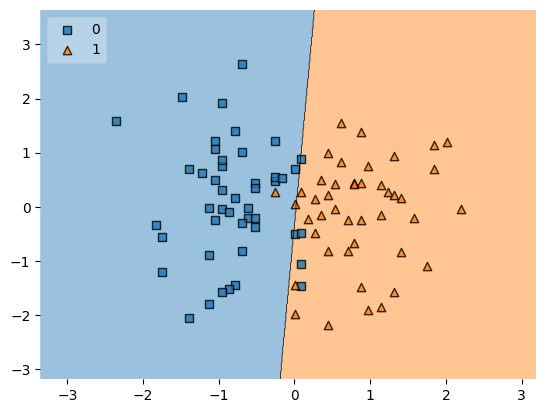

In [415]:
plot_decision_regions(x_train, y_train.values, clf = clf, legend = 2)

In [416]:
import pickle

In [417]:
pickle.dump(clf, open('model.pkl', 'wb'))